Import Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import Dataset


In [3]:
df = pd.read_csv("election_results_2024.csv")

In [4]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


Data Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [6]:
df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

- There are 2 columns where 1 null value present in each. So handle this missing values.

In [7]:
df["Trailing Candidate"].fillna("Unknown", inplace=True)
df["Trailing Party"].fillna("Unknown Party", inplace=True)

In [8]:
df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

- Here the Margin have not numeric data type. Lets change it.

In [9]:
df.Margin

0      329991
1       48282
2       49036
3      281794
4      306559
        ...  
538     81648
539    364422
540    199013
541     94473
542     46188
Name: Margin, Length: 543, dtype: object

In [10]:
df["Margin"] = pd.to_numeric(df["Margin"], errors="coerce")
df["Margin"].head()

0    329991.0
1     48282.0
2     49036.0
3    281794.0
4    306559.0
Name: Margin, dtype: float64

In [11]:
df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                1
Status                0
dtype: int64

- Lets fill the null value of margin

In [12]:
df.fillna({"Margin":df["Margin"].median()}, inplace=True)

In [13]:
df.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [14]:
df["Margin"] = df["Margin"].astype(int)

- Is any Duplicated Values or not?

In [15]:
df.duplicated().sum()

np.int64(0)

-  We don't need Status columns for EDA, so remove/drop it.


In [16]:
df.drop(columns=["Status"],inplace=True)

In [17]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559


EDA

Total Number of Consituencies

In [18]:
df["Constituency"].shape

(543,)

1. Which political party won the most constituencies?

In [19]:
sns.set_style(style="white")

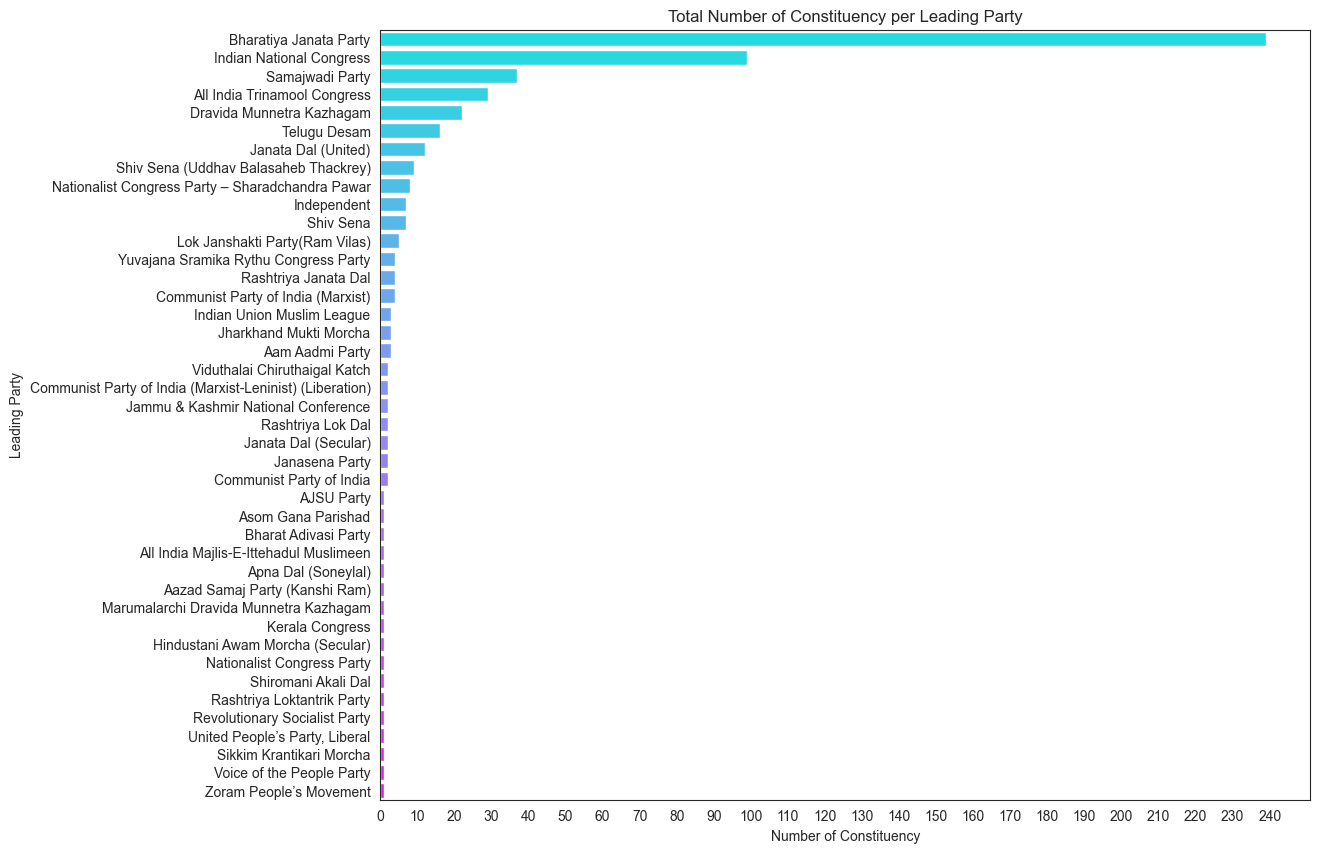

In [20]:
lead_party_total_const = df.groupby("Leading Party")["Constituency"].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,10))

sns.barplot(x=lead_party_total_const.values,
            y=lead_party_total_const.index,
            palette="cool")
plt.xticks(ticks=np.arange(0,250,10))
plt.xlabel("Number of Constituency")
plt.title("Total Number of Constituency per Leading Party")
plt.show()

2. What is the average winning margin for each party?

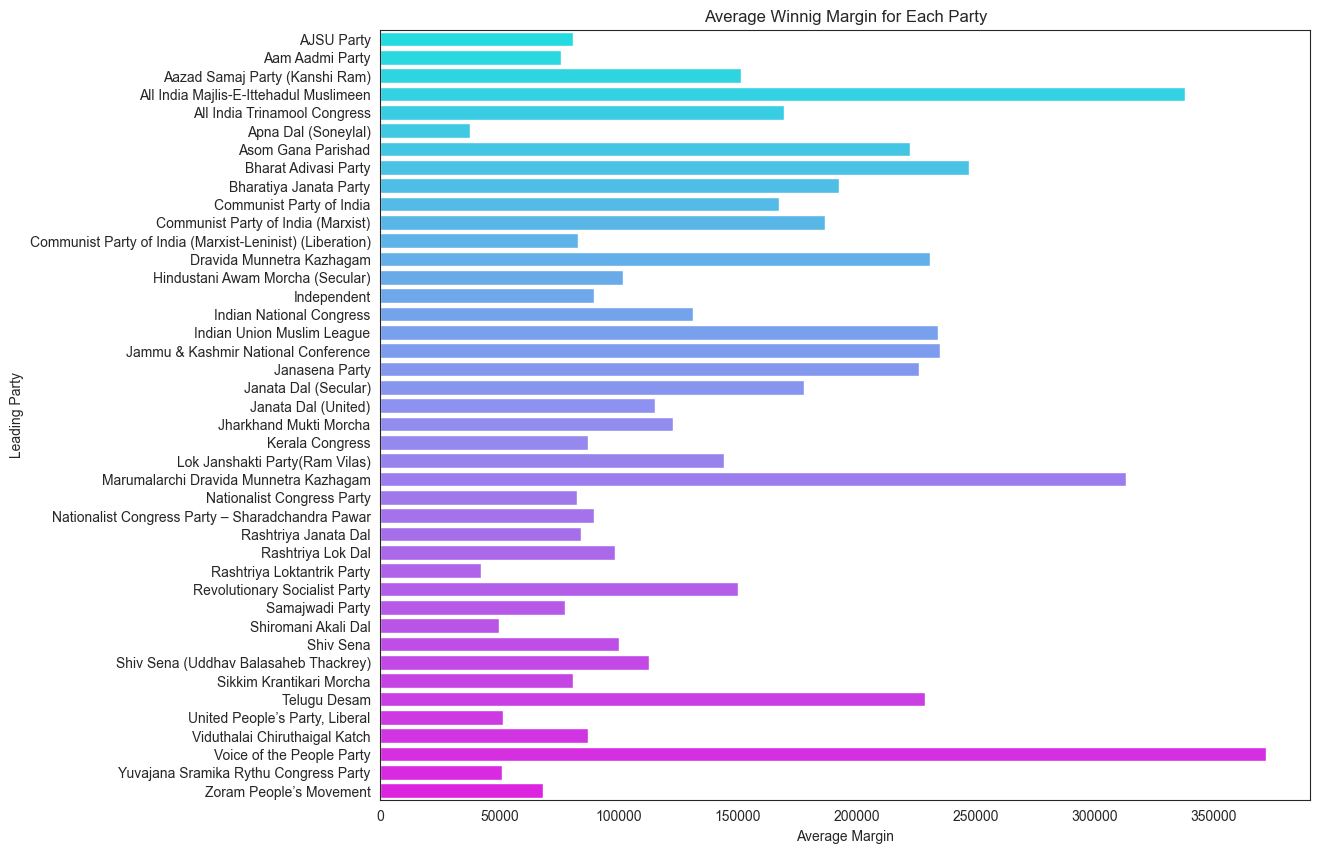

In [39]:
avg_margin = df.groupby("Leading Party")["Margin"].mean()
plt.figure(figsize=(12,10))
sns.barplot(x=avg_margin.values,
            y=avg_margin.index,
            palette="cool")
plt.title("Average Winnig Margin for Each Party")
plt.xlabel("Average Margin")
plt.show()

3. Which constituency had the smallest and largest victory margins?

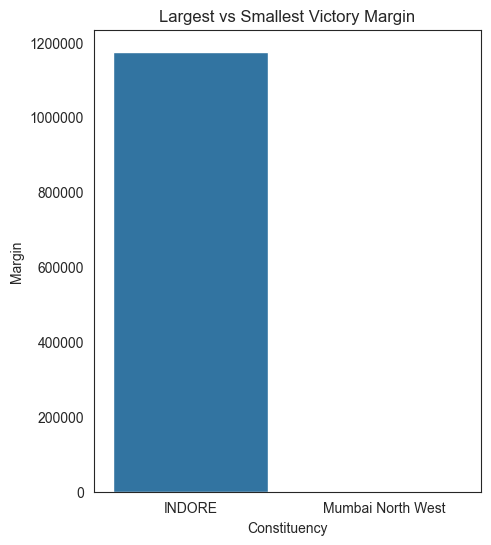

In [22]:
largest_margin_victory = df.loc[df["Margin"]==df["Margin"].max()][["Constituency","Margin"]]
smallest_margin_victory = df.loc[df["Margin"]==df["Margin"].min()][["Constituency","Margin"]]
victory_margin = pd.concat([largest_margin_victory,smallest_margin_victory],ignore_index=True)

plt.figure(figsize=(5,6))
plt.ticklabel_format(style="plain", axis='y')
sns.barplot(data=victory_margin, x="Constituency",y="Margin")
plt.title("Largest vs Smallest Victory Margin")
plt.show()

In [23]:
victory_margin

,Constituency,Margin
0,INDORE,1175092
1,Mumbai North West,48


4. Is there a relationship between the winning party and their margin of victory?

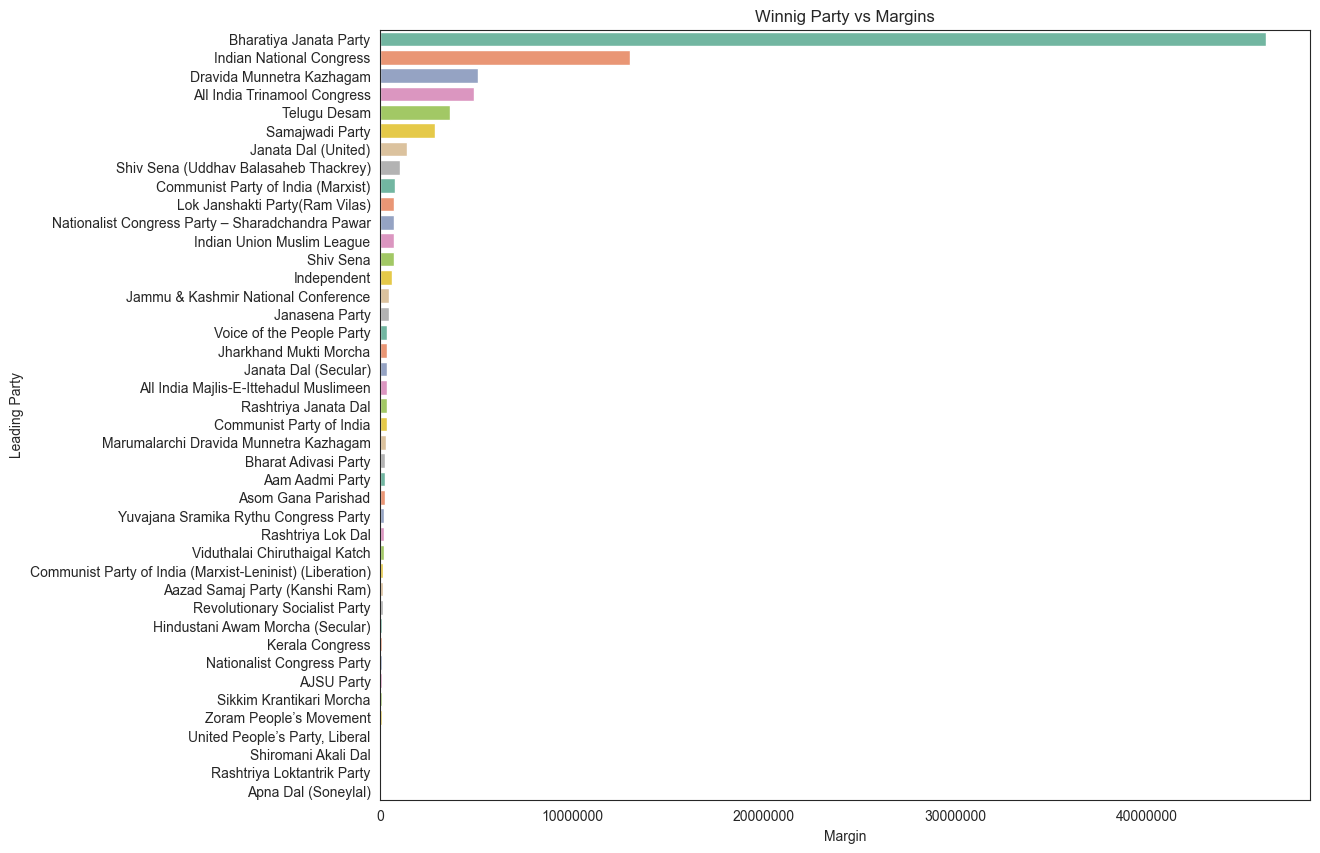

In [40]:
win_party_margin = df.groupby("Leading Party")["Margin"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(y=win_party_margin.index, x=win_party_margin.values, palette="Set2")
plt.ticklabel_format(style="plain", axis="x")
plt.title("Winnig Party vs Margins")
plt.xlabel("Margin")
plt.show()

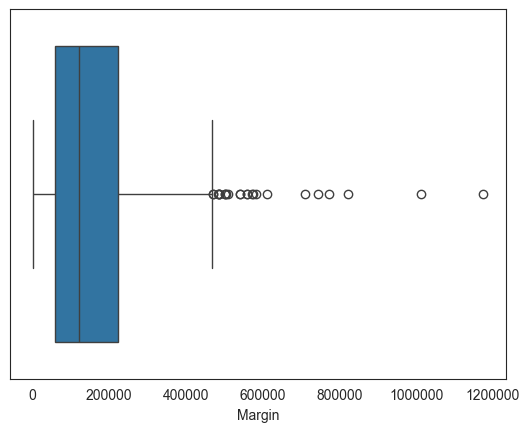

In [25]:
sns.boxplot(x=df["Margin"])
plt.ticklabel_format(style="plain",axis='x')

5. List of Winning Constituency of BJP

In [26]:
df.loc[df["Leading Party"]=="Bharatiya Janata Party"]["Constituency"].unique()

array(['AJMER', 'ALWAR', 'Adilabad', 'Agra', 'Ahmedabad East',
       'Ahmedabad West', 'Akbarpur', 'Akola', 'Aligarh', 'Alipurduars',
       'Almora', 'Amreli', 'Amroha', 'Anakapalle', 'Anand',
       'Andaman & Nicobar Islands', 'Araria', 'Arunachal East',
       'Arunachal West', 'Aska', 'BALAGHAT', 'BASTAR', 'BETUL',
       'BHILWARA', 'BHIND', 'BHIWANI-MAHENDRAGARH', 'BHOPAL', 'BIKANER',
       'BILASPUR', 'Bagalkot', 'Baharaich', 'Balasore', 'Balurghat',
       'Bangalore North', 'Bangalore Rural', 'Bangalore South',
       'Bangalore central', 'Bangaon', 'Bansgaon', 'Bardoli', 'Bareilly',
       'Bargarh', 'Begusarai', 'Belgaum', 'Berhampur', 'Bhadohi',
       'Bhadrak', 'Bharuch', 'Bhavnagar', 'Bhubaneswar', 'Bijapur',
       'Bishnupur', 'Bolangir', 'Bulandshahr', 'CHHINDWARA',
       'CHITTORGARH', 'Chandni Chowk', 'Chatra', 'Chevella',
       'Chhota Udaipur', 'Chikkballapur', 'Chitradurga', 'Cuttack',
       'DAMOH', 'DEWAS', 'DHAR', 'DURG', 'Dadar & Nagar Haveli', 'Dahod',

6. How many seats did the top 5 parties win, and what is their share in total seats?

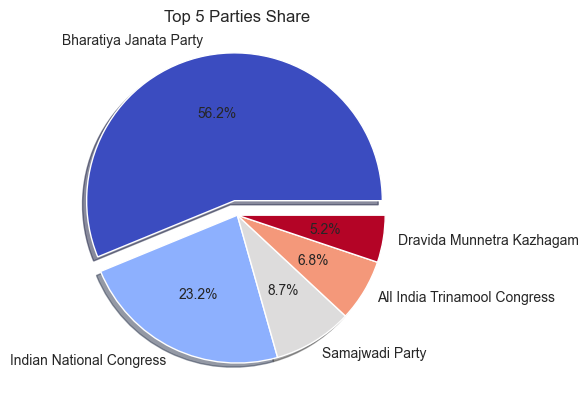

Leading Party
Bharatiya Janata Party          240
Indian National Congress         99
Samajwadi Party                  37
All India Trinamool Congress     29
Dravida Munnetra Kazhagam        22
Name: count, dtype: int64


In [41]:
df.head()
top_5_leading_party = df["Leading Party"].value_counts().sort_values(ascending=False).head(5)
cmap = plt.get_cmap('coolwarm')
plt.pie(top_5_leading_party.values,
        labels=top_5_leading_party.index,
        autopct="%1.1f%%",
        explode=[0.1,0,0,0,0],
        shadow=True,
        colors=[cmap(i) for i in np.linspace(0,1,len(top_5_leading_party.index))])
plt.title("Top 5 Parties Share")
plt.show()
print(top_5_leading_party)

7. Identify candidates who won with the highest and lowest margins — were they from major or smaller parties?

In [28]:
highest_margin_candidates = df[["Leading Party","Leading Candidate","Constituency","Margin"]].sort_values("Margin",ascending=False,ignore_index=True).head(2)
lowest_margin_candidates = df[["Leading Party","Leading Candidate","Constituency","Margin"]].sort_values("Margin",ignore_index=True).head(2)


In [29]:
highest_margin_candidates

,Leading Party,Leading Candidate,Constituency,Margin
0,Bharatiya Janata Party,SHANKAR LALWANI,INDORE,1175092
1,Indian National Congress,RAKIBUL HUSSAIN,Dhubri,1012476


In [30]:
lowest_margin_candidates

,Leading Party,Leading Candidate,Constituency,Margin
0,Shiv Sena,RAVINDRA DATTARAM WAIKAR,Mumbai North West,48
1,Indian National Congress,ADV ADOOR PRAKASH,Attingal,684


In [31]:
df.loc[df["Constituency"]=="INDORE"]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092


In [32]:
df.loc[df["Constituency"]=="Mumbai North West"]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin
357,Mumbai North West,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48


8. Are there any patterns in trailing parties — which major parties lost the most?

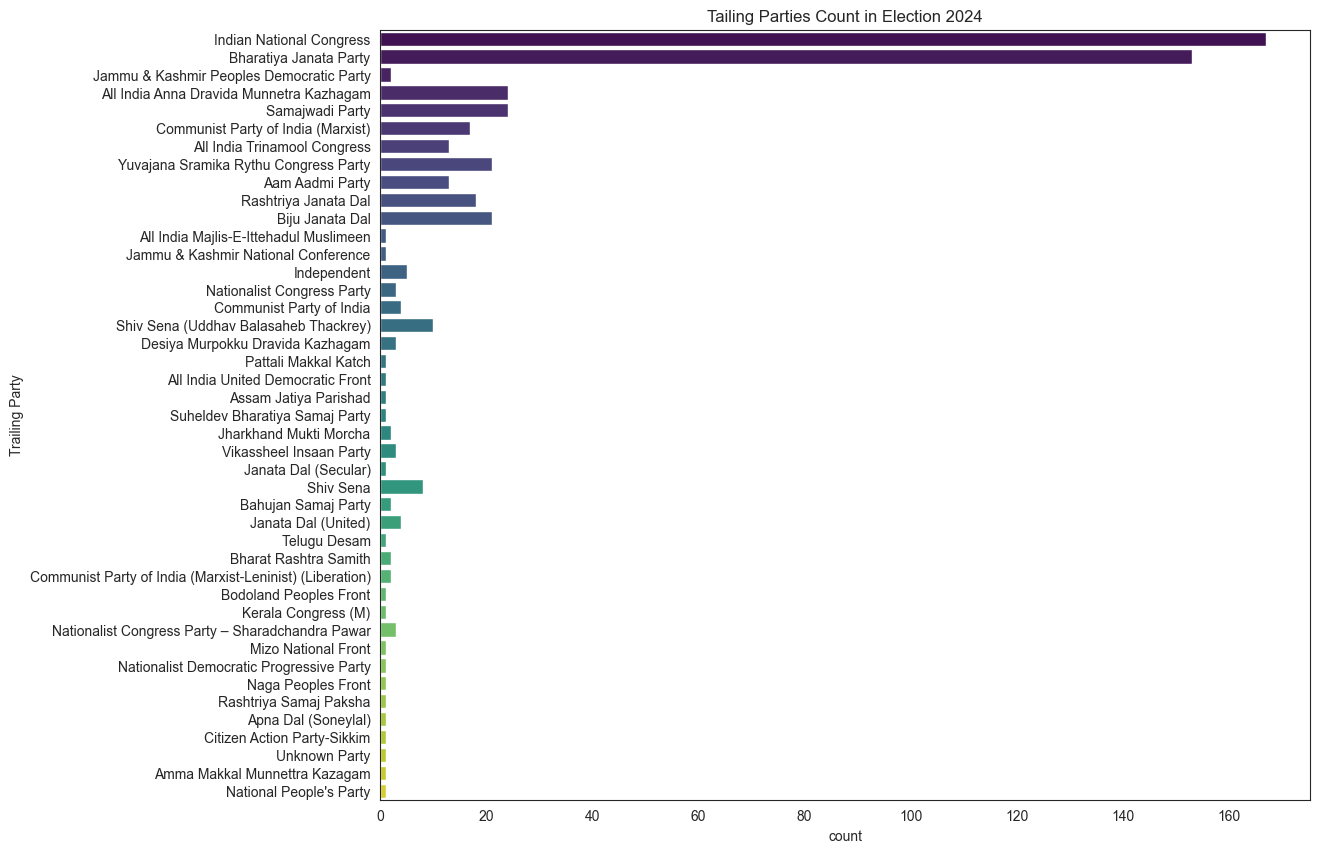

Trailing Party
Indian National Congress    167
Bharatiya Janata Party      153
Name: count, dtype: int64


In [33]:
plt.figure(figsize=(12,10))
sns.countplot(df["Trailing Party"], palette="viridis")
plt.title("Tailing Parties Count in Election 2024")
plt.show()
print(df["Trailing Party"].value_counts().sort_values(ascending=False).head(2))

- Yes, 2 major parties like `Indian National Congress` and `Bharatiya Janta Party` had more compatition bewteen them. They lost above 150 constituencies.

9. What percentage of total seats were won by BJP, INC, Samajwadi Party and Others?

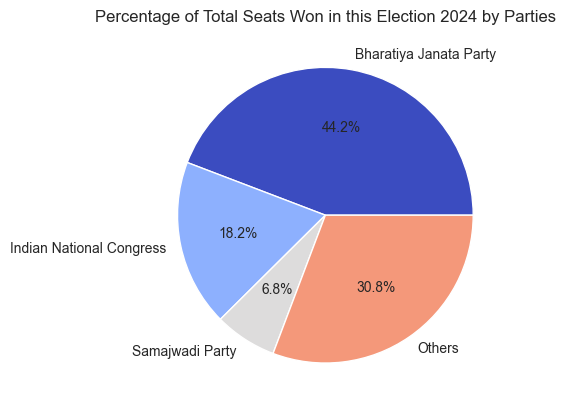

In [34]:
lead_party = df["Leading Party"].value_counts()
other_parties = lead_party[3:].sum()
seats_per_parties = [i for i in lead_party.values[:3]]
seats_per_parties.append(other_parties)

labels = [i for i in lead_party.index[:3]]
labels.append("Others")

cmap = plt.get_cmap('coolwarm')

plt.pie(seats_per_parties,labels=labels,autopct="%1.1f%%",
        colors=[cmap(i) for i in np.linspace(0,1,len(top_5_leading_party.index))])

plt.title("Percentage of Total Seats Won in this Election 2024 by Parties")
plt.show()

10. Narendra Modi vs Rahul Gandhi

In [35]:
NM = df.loc[(df["Leading Candidate"]=="NARENDRA MODI")]
RG = df.loc[(df["Leading Candidate"]=="RAHUL GANDHI")]
narendra_rahul_df = pd.concat([NM,RG],ignore_index=True)
narendra_rahul_df = pd.DataFrame(narendra_rahul_df.groupby(["Leading Candidate","Constituency"])["Margin"].sum())

In [36]:
narendra_rahul_df

Margin
Leading Candidate Constituency        
NARENDRA MODI     Varanasi      152513
RAHUL GANDHI      Rae Bareli    390030
                  Wayanad       364422

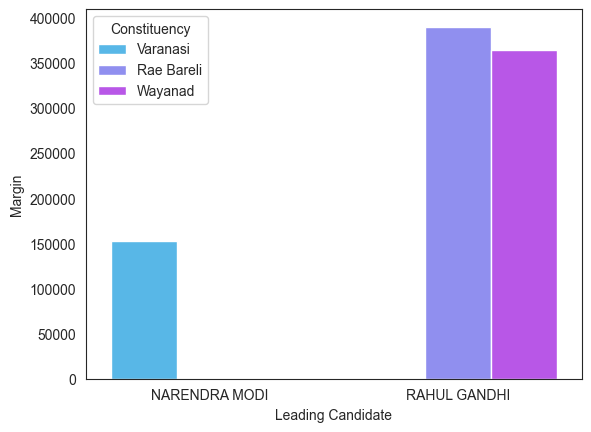

In [37]:
sns.barplot(narendra_rahul_df,x="Leading Candidate",y="Margin", hue="Constituency",palette="cool")
plt.show()

Total Votes for BJP and INC

In [38]:
bjp_votes = df.loc[df["Leading Party"]=="Bharatiya Janata Party"]["Constituency"].nunique()
inc_votes = df.loc[df["Leading Party"]=="Indian National Congress"]["Constituency"].nunique()
print("BJP won by",bjp_votes,"votes. INC won by",inc_votes,"votes.")

BJP won by 239 votes. INC won by 99 votes.


#### Conclusion
- There are total 543 Lok Sabha Constituencies.
- BJP have most constituencies.
- Voice of the People Party won by average margin.
- Indore have largest victory margin with 1175092 and Mumbai North West have smallest victory margin with 48.
- There is a relationship between winning party and thier margin of victory is that more constituency, more margin.
- BJP have 56.1% share in top 5 parties.
- INC have 23.2% share in top 5 parties.
- Shankar Lalwani from Indore with BJP leading Party have highest margin candidate and beat Sanjay s/o Lakshman Solanki form Bahujan Samaj Party.
- Ravindra Dattaram Waikar from Mumbai North West with Shiv Sena leading Party have lowest margin candidate and beat Amol Gajanan Kirtikar from Shiv Sena (Uddhav Balasaheb Thackrey).
- INC lost 167 and BJP lost 153 constituencies.
- 44.1% seat won by BJP, 18.3% by INC, 6.8% by Samajwadi Party and rest 30.8% share by other parties.
- Narendra Modi was the candidate from Varanasi and Rahul Gandhi was the candidate from Rae Bareli and Wayanad.
- Rahul Gandhi won with highest margin with his opponent in both constituency as compare to Narendra Modi.